In [4]:
import numpy as np
import matplotlib.pyplot as plt
#import os
#from astropy.io import fits
#import pandas as pd
import matplotlib.colors as colors
from astropy import stats
from skimage.transform import resize
from scipy.ndimage import rotate

In [5]:
def load_and_prep_data(filepath, crop_size=None, downsample_size=None):
    '''
    Load and prepare data from a .npy file
    Returns 3D array of images
    '''
    # Load data
    images = np.load(filepath, allow_pickle=True)
    num_images, image_size, _ = images.shape

    # Sigma clip data
    sigma = 3
    for i in range(num_images):
        _, median, std = stats.sigma_clipped_stats(images[i], sigma=sigma)
        images[i][images[i] < median+sigma*std] = median+sigma*std

    # Crop data
    if crop_size != None:
        low_idx, upper_idx = image_size//2-crop_size//2, image_size//2+crop_size//2
        images = images[:, low_idx:upper_idx, low_idx:upper_idx]

    # Resize data (downsampling)
    if downsample_size != None:
        images = resize(images, (num_images, downsample_size, downsample_size))

    # Normalise data [-1,1]
    for i in range(num_images):
        images[i] = 2*(images[i]-np.min(images[i]))/np.ptp(images[i])-1

    return images


fr1_filepath = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\Good\good_fr1.npy'
fr2_filepath = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\Good\good_fr2.npy'
bent_filepath = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\Good\good_bent.npy'
comp_filepath = r'C:\Users\JakeM\Google Drive\University of Birmingham\Year 4\Project\Data\Good\good_comp.npy'

crop_size = None
downsample_size = None

# Load and prepare images
fr1 = load_and_prep_data(fr1_filepath, crop_size, downsample_size)
fr2 = load_and_prep_data(fr2_filepath, crop_size, downsample_size)
bent = load_and_prep_data(bent_filepath, crop_size, downsample_size)
comp = load_and_prep_data(comp_filepath, crop_size, downsample_size)

In [10]:
print(fr1.shape, fr2.shape, bent.shape, comp.shape)

(220, 150, 150) (405, 150, 150) (226, 150, 150) (243, 150, 150)


(226, 150, 150)


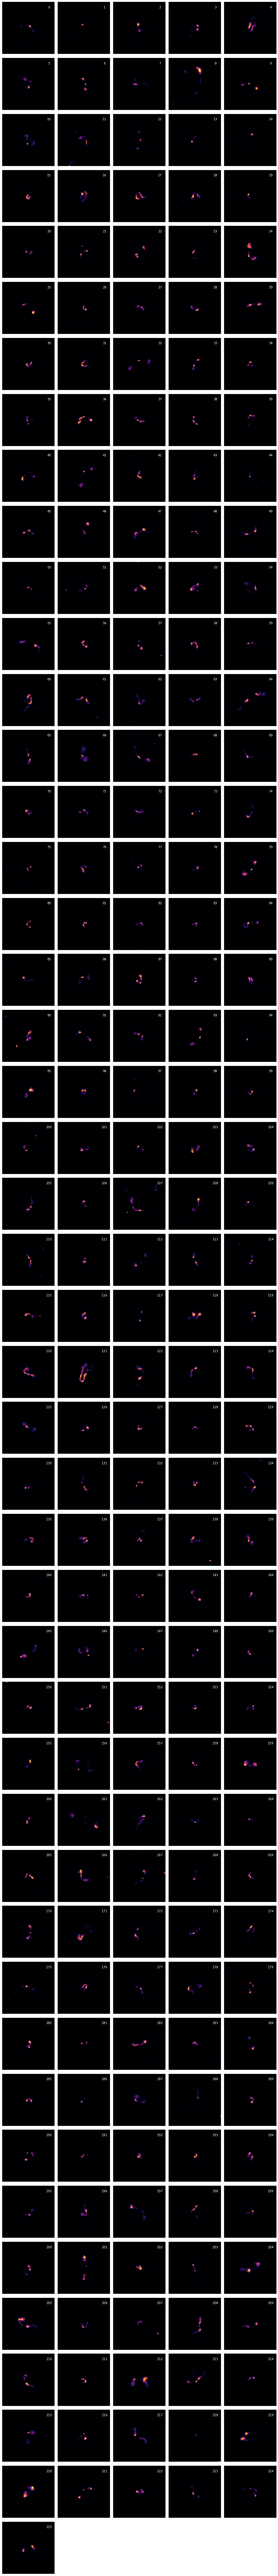

In [9]:
def display_image_array(images, cols=5, n=None, log=False):
    if n == None: n = len(images)
    print(images.shape)
    fig = plt.figure(figsize=(12.5,(n+cols-1)//cols*2.5))
    for i in range(n):
        ax = fig.add_subplot((n+cols-1)//cols, cols, i+1)
        data = images[i]
        if log:
            data = (data-np.min(data))/np.ptp(data)+0.01 # normalises image for log plotting
            ax.imshow(data, cmap='inferno', norm=colors.LogNorm())
        else:
            ax.imshow(data, cmap='inferno')
        ax.text(0.9, 0.9, i, ha='center', va='center', transform=ax.transAxes, color='w')
        plt.axis('off')
    fig.tight_layout()
    plt.show()
    
display_image_array(bent)